In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma

# Probability Theory for Thermal Physics - Lecture 3

```{admonition} Relevant readings and preparation
:class: reading


```{admonition} Learning outcomes:
:class: outcomes
- Identify and use the **normal (Gaussian) distribution** as an approximation to many natural phenomena.
- Understand the Central Limit Theorem and its relevance to Thermodynamics.
- Describe the **Poisson distribution** and its relevance to counting statistics and random thermal events.

## Key Distributions - Gaussian, Poisson, Maxwell-Boltzmann

In thermal physics, we often study systems comprised of an enormous number of particles. Instead of tracking the exact trajectories of each particle exhaustively, we rely on probability distributions which describe the typical behaviour of the system as a whole. The Gaussian, Poisson, and Maxwell-Boltzmann distributions are especially important because they each capture a common pattern observed in physical processes present in thermodynamics. Understanding these distributions helps in explaining how microscopic randomness produces the macroscopic behaviour we observe. Consider this an introduction to these key distributions, as we will go through them in more detail within Chapter 6.

### Gaussian (Normal) Distribution

A continuous, bell-shaped probability density function:

$$
f(x; \mu, \sigma)=\frac{1}{\sqrt{2\pi}\, \sigma}\exp\! \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

The mean and variance are $\langle x\rangle=\mu$ and $\sigma^2$.
By the Central Limit Theorem, the sum or average of many independent random variables tends toward a Gaussian distribution, regardless of the original shape.

The Gaussian distribution is relevant because many physical quantities arise from the combined effect of many small, often random contributions. When these contributions add together, their overall behaviour tends to form a Gaussian distribution with its characteristic bell-shaped curve. This is why energy fluctuations, measurement noise, and small variations in macroscopic observables often follow a normal distribution. In practice, the Gaussian serves as a “default” model for fluctuations in thermal systems, reflecting how microscopic randomness smooths out into predictable macroscopic behaviour. An extremely common type of Gaussian distribution is the *standard normal distribution*, which is when $\mu = 0$ and $\sigma = 1$.

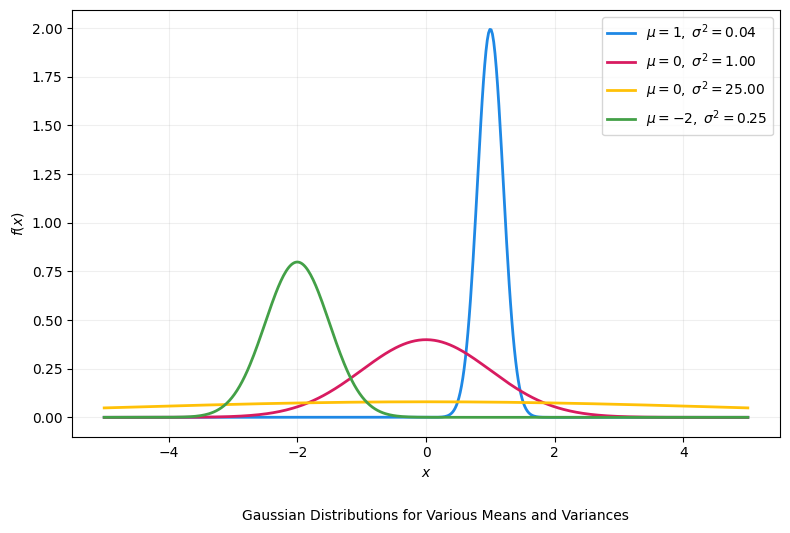

In [5]:
CUD_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.linspace(-5, 5, 500)

params = [
    (1, 0.2),
    (0, 1.0),
    (0, 5.0),
    (-2, 0.5)
]

plt.figure(figsize=(8, 5))

# Cycle through colours
for (mu, sigma), col in zip(params, CUD_COLORS):
    y = gaussian(x, mu, sigma)
    plt.plot(
        x, y,
        color=col,
        linewidth=2,
        label=f"$\\mu={mu},\\;\\sigma^2={sigma**2:.2f}$"
    )

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55, y=-0.05,
    s="Gaussian Distributions for Various Means and Variances",
    ha='center'
)

plt.show()

## The Central Limit Theorem

## Poisson Distribution

A discrete distribution describing the number of rare, independent events occurring in a fixed interval:

$$
P(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k! }, \qquad k=0, 1, 2, \dots
$$

The mean and variance are both $\langle k\rangle=\lambda$.
It arises as the limit of the binomial distribution for large $n$, small $p$, with $\lambda = np$. The parameter, $\lambda$, can be thought of as a rate parameter, controlling the frequency of occurrence for whatever event it is being used to describe.

The Poisson distribution is important whenever we count events that occur randomly and independently. In thermal physics, this becomes especially relevant when we measure how often certain microscopic events occur over time; for example, molecular collisions, detections of radioactive decay events, or the number of particles crossing a surface. These processes involve random events happening at an approximately steady average rate, which makes the Poisson distribution well-suited to describing them. It helps us understand the size of fluctuations in these counting experiments and explains the origin of *shot noise*: the unavoidable statistical variations in the number of detected events, even when the average rate stays constant.

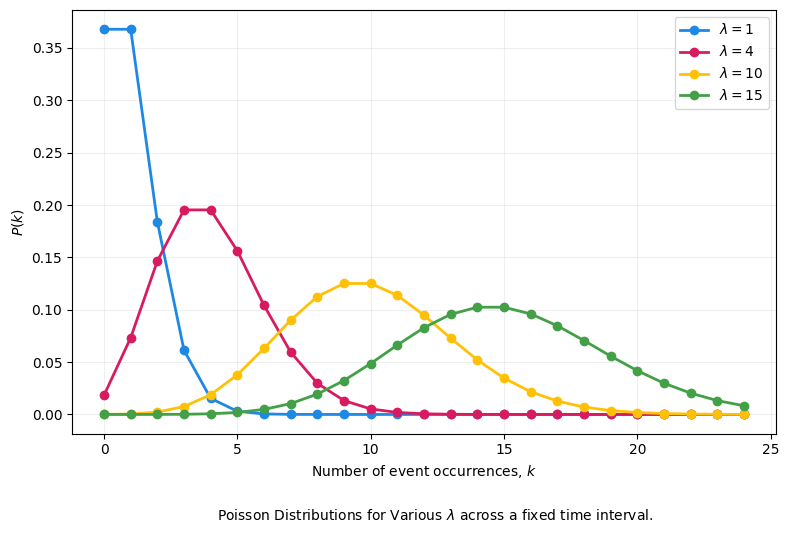

In [6]:
from scipy.stats import poisson

# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

ks = np.arange(0, 25)
lambdas = [1, 4, 10, 15]

plt.figure(figsize=(8, 5))

for lam, col in zip(lambdas, MATERIAL_COLORS):
    y = poisson.pmf(ks, lam)
    plt.plot(
        ks, y,
        marker='o',
        color=col,
        linewidth=2,
        label=f"$\\lambda={lam}$"
    )

plt.xlabel("Number of event occurrences, $k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(x=0.55, y=-0.05, s="Poisson Distributions for Various $\\lambda$ across a fixed time interval.",
            ha='center')

plt.show()

## Maxwell–Boltzmann Speed Distribution (3D Ideal Gas)

The Maxwell-Boltzmann distribution is a particular probability distribution named after James Clerk Maxwell and Ludwig Boltzmann, and was first defined for describing particle speeds in idealized gases.

$$
f(v; T, m)=4\pi\! \left(\frac{m}{2\pi k_B T}\right)^{3/2} v^2 \exp\! \left(-\frac{m v^2}{2k_B T}\right), \qquad v\ge 0
$$

The Maxwell–Boltzmann distribution plays a central role in kinetic theory because it describes the spread of particle speeds in a classical ideal gas. It shows that, at a given temperature, some particles move slowly while others move very fast, and it gives precise predictions for the most probable speed, the average speed, and the rms speed. These predictions feed directly into calculations of pressure, diffusion, heat transfer, and collision rates. In essence, this distribution connects random molecular motion to the observable properties of gases.

Key quantities:

- Most probable speed: $v_p=\sqrt{\frac{2k_B T}{m}}$
- Mean speed: $\langle v\rangle=\sqrt{\frac{8k_B T}{\pi m}}$
- RMS speed: $v_{\mathrm{rms}}=\sqrt{\frac{3k_B T}{m}}$

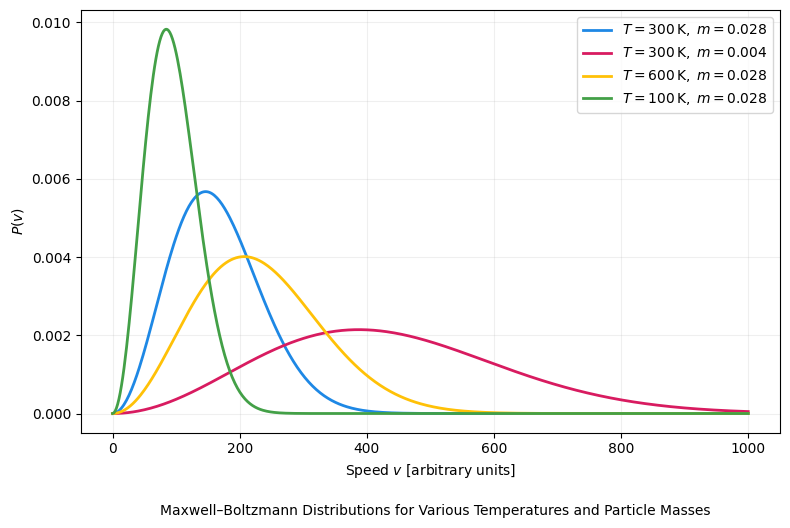

In [7]:
# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]


def maxwell_boltzmann(v, T, m, kB=1):
    return 4 * np.pi * (m / (2 * np.pi * kB * T)) ** 1.5 * v ** 2 * np.exp(-m * v ** 2 / (2 * kB * T))


v = np.linspace(0, 1000, 500)

params = [
    (300, 0.028),  # Room temp, nitrogen-like
    (300, 0.004),  # Light molecule
    (600, 0.028),  # Higher temperature
    (100, 0.028)  # Lower temperature
]

plt.figure(figsize=(8, 5))

for (T, m), col in zip(params, MATERIAL_COLORS):
    y = maxwell_boltzmann(v, T, m)
    plt.plot(
        v, y,
        color=col,
        linewidth=2,
        label=f"$T={T}\\,\\text{{K}},\\;m={m}$"
    )

plt.xlabel("Speed $v$ [arbitrary units]")
plt.ylabel("$P(v)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55,
    y=-0.04,
    s="Maxwell–Boltzmann Distributions for Various Temperatures and Particle Masses",
    ha='center'
)

plt.show()